# __Análise de Transações__ 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Carregando arquivos

In [ ]:
df = pd.read_csv("dados/transacoes.csv")
df.head()

NameError: name 'pd' is not defined

In [3]:
df.shape

(3175, 3)

In [4]:
df.dtypes

f0_       object
status    object
f1_        int64
dtype: object

In [5]:
df.rename(columns={"f0_":"horario", "f1_":"transacoes"}, inplace=True)
df.head()

,horario,status,transacoes
0,00h 00,denied,8
1,00h 00,approved,15
2,00h 01,refunded,1
3,00h 01,denied,6
4,00h 01,approved,9


In [6]:
df.horario = pd.to_datetime(df.horario, format="%Hh %M").dt.strftime("%H %M")

In [7]:
df.tail()

,horario,status,transacoes
3170,18 58,approved,232
3171,18 59,denied,38
3172,18 59,reversed,2
3173,18 59,refunded,1
3174,18 59,approved,239


In [8]:
df_pivoted = df.pivot(index="horario", columns="status", values="transacoes")

In [9]:
df_pivoted.head()

status,approved,backend_reversed,denied,echo,failed,processing,refunded,reversed
horario,,,,,,,,
00 00,15.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
00 01,9.0,NaN,6.0,NaN,NaN,NaN,1.0,NaN
00 02,18.0,NaN,5.0,3.0,NaN,NaN,1.0,NaN
00 03,11.0,NaN,4.0,NaN,NaN,NaN,1.0,NaN
00 04,16.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN


In [10]:
df_pivoted.isna().sum()

status
approved              23
backend_reversed     927
denied               148
echo                 995
failed              1069
processing          1075
refunded             685
reversed             519
dtype: int64

In [11]:
df_pivoted["total_reversed"] = df_pivoted["backend_reversed"] + df_pivoted["reversed"]
df_pivoted.head()

status,approved,backend_reversed,denied,echo,failed,processing,refunded,reversed,total_reversed
horario,,,,,,,,,
00 00,15.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
00 01,9.0,NaN,6.0,NaN,NaN,NaN,1.0,NaN,NaN
00 02,18.0,NaN,5.0,3.0,NaN,NaN,1.0,NaN,NaN
00 03,11.0,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN
00 04,16.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_pivoted.shape

(1077, 9)

In [13]:
df_pivoted.isna().sum()

status
approved              23
backend_reversed     927
denied               148
echo                 995
failed              1069
processing          1075
refunded             685
reversed             519
total_reversed       961
dtype: int64

In [14]:
valid_columns = ["approved", "total_reversed", "denied", "failed"]

In [15]:
df_pivoted.fillna(0, inplace=True)

In [16]:
df_pivoted["total_reversed"] = df_pivoted["backend_reversed"] + df_pivoted["reversed"]
df_pivoted.head()

status,approved,backend_reversed,denied,echo,failed,processing,refunded,reversed,total_reversed
horario,,,,,,,,,
00 00,15.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
00 01,9.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0
00 02,18.0,0.0,5.0,3.0,0.0,0.0,1.0,0.0,0.0
00 03,11.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
00 04,16.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


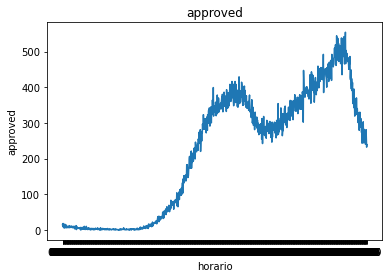

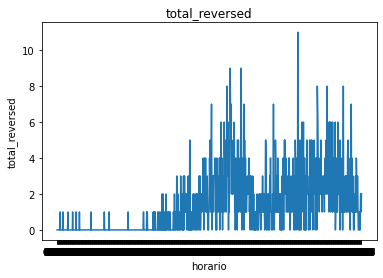

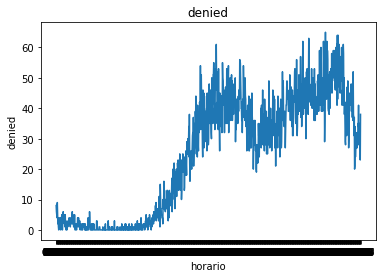

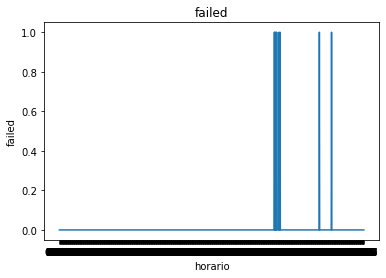

In [17]:
for column in valid_columns:
    plt.title(column)
    sns.lineplot(x=df_pivoted.index, y=column, data=df_pivoted)
    #plt.xticks([df_feature.index[0], df_feature.index[-1]])
    plt.show()

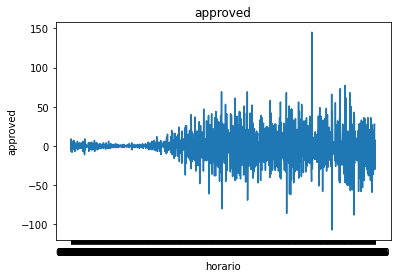

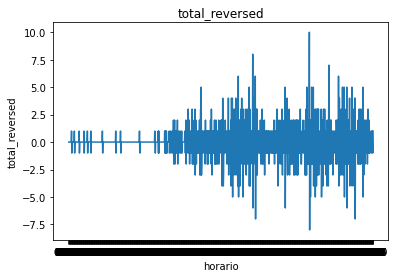

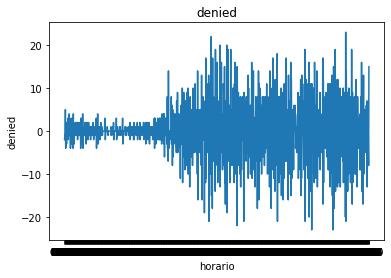

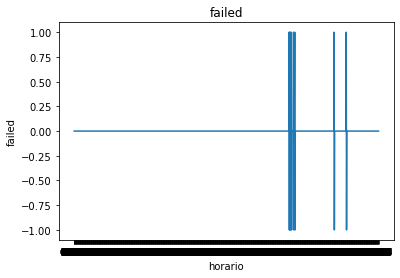

In [18]:
for column in valid_columns:
    plt.title(column)
    sns.lineplot(x=df_pivoted.index, y=column, data=df_pivoted.diff())
    #plt.xticks([df_feature.index[0], df_feature.index[-1]])
    plt.show()

<AxesSubplot:xlabel='horario'>

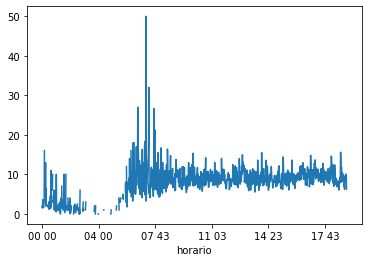

In [19]:
(df_pivoted["approved"]/df_pivoted["denied"]).plot()

<AxesSubplot:xlabel='horario'>

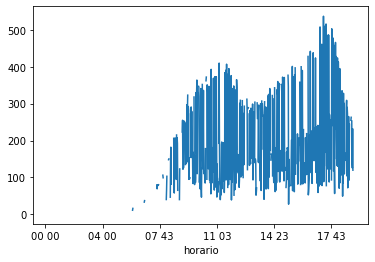

In [20]:
(df_pivoted["approved"]/df_pivoted["total_reversed"]).plot()

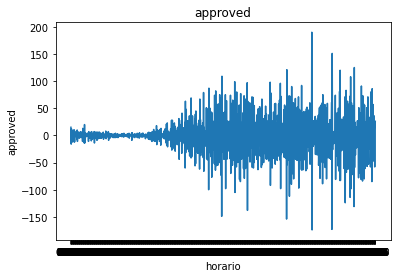

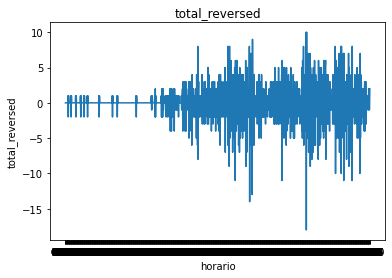

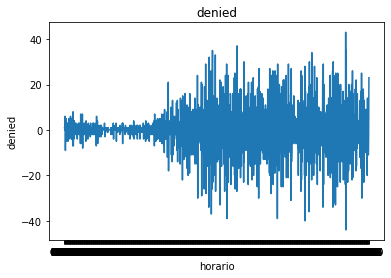

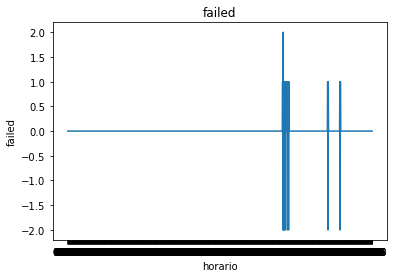

In [21]:
for column in valid_columns:
    plt.title(column)
    sns.lineplot(x=df_pivoted.index, y=column, data=df_pivoted.diff().diff())
    #plt.xticks([df_feature.index[0], df_feature.index[-1]])
    plt.show()

In [24]:
df_train = df_pivoted[valid_columns]

In [25]:
from sklearn.model_selection import train_test_split

x_train_denied, x_test_denied ,y_train_denied, y_test_denied = train_test_split(
    df_train.drop(columns=["denied"]).values, df_train["denied"].values, random_state=7)

In [26]:
from statsmodels.api import OLS

lr = OLS(y_train_denied, x_train_denied)

In [27]:
model = lr.fit()

In [28]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              8224.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):                        0.00
Time:                        09:41:19   Log-Likelihood:                         -2533.7
No. Observations:                 807   AIC:                                      5073.
Df Residuals:                     804   BIC:                                      5088.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [131]:
x_train_denied.shape

(807, 3)

In [29]:
x_test_denied.shape

(270, 3)

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_denied, y_train_denied)

LinearRegression()

In [31]:
y_pred_denied = lr.predict(x_test_denied)

In [32]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_denied, y_pred_denied)
print("Erro médio quadrático: {}".format(mse))

Erro médio quadrático: 35.31660181777713


In [33]:
df_pred_denied = pd.DataFrame({"denied": y_test_denied, "denied_pred":y_pred_denied})

In [34]:
df_pred_denied

,denied,denied_pred
0,0.0,1.419460
1,40.0,36.740961
2,46.0,51.183771
3,41.0,43.569860
4,35.0,27.645606
...,...,...
265,34.0,36.839216
266,36.0,40.763770
267,0.0,1.311533
268,34.0,34.513704


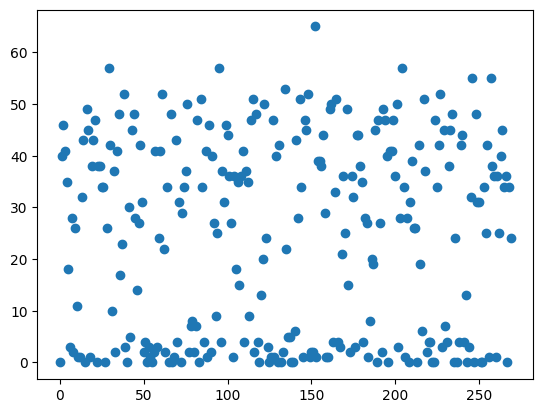

In [154]:
plt.scatter(df_pred_denied.index, df_pred_denied.denied)

In [85]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(random_state=7, contamination=0.1).fit(df_train.denied.diff().dropna().values.reshape(-1,1))

In [86]:
df_pred_denied = isf.predict(df_train.denied.diff().dropna().values.reshape(-1,1))

In [87]:
df_pred_denied = np.concatenate((np.array([1]), df_pred_denied), axis=None)

In [88]:
df_train["pred_denied"] = df_pred_denied

<AxesSubplot:xlabel='horario', ylabel='denied'>

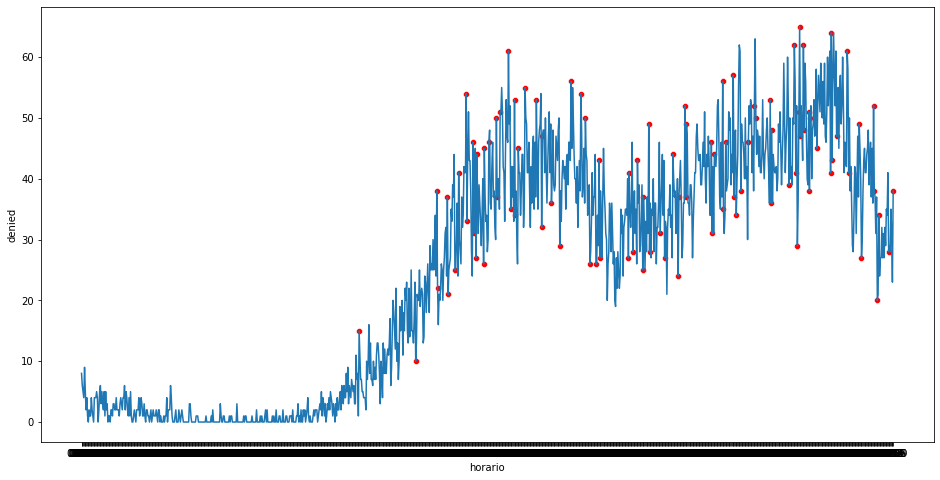

In [89]:
plt.figure(figsize=(16,8))
data=df_train[df_train.pred_denied == -1]
sns.lineplot(x=df_train.index, y=df_train.denied.values)
sns.scatterplot(x=data.index, y=data.denied, data=data, color="red")

In [82]:
df_train.pred_denied[df_train.pred_denied == -1]

horario
09 42   -1
10 13   -1
10 37   -1
11 13   -1
15 37   -1
16 52   -1
17 37   -1
Name: pred_denied, dtype: int64

<AxesSubplot:xlabel='denied', ylabel='Density'>

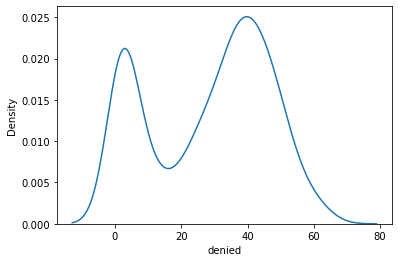

In [90]:
sns.kdeplot(data=df_train.replace(0, np.NaN), x="denied")

<AxesSubplot:xlabel='approved', ylabel='Density'>

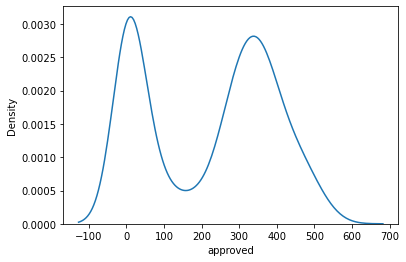

In [91]:
sns.kdeplot(data=df_train.replace(0, np.NaN), x="approved")

<AxesSubplot:xlabel='total_reversed', ylabel='Density'>

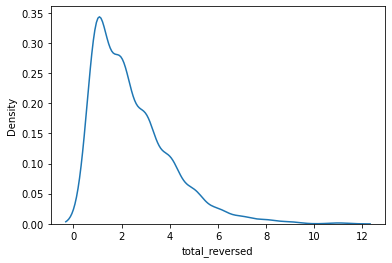

In [92]:
sns.kdeplot(data=df_train.replace(0, np.NaN), x="total_reversed")

<AxesSubplot:xlabel='total_reversed', ylabel='Density'>

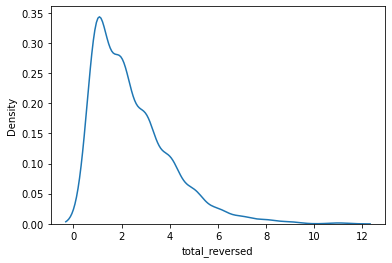

In [93]:
sns.kdeplot(data=df_train.replace(0, np.NaN), x="total_reversed")

In [95]:
df_stats = df_train.replace(0, np.NaN).describe()

In [131]:
df_train["reversed_zscore"] = df_train["total_reversed"].apply(lambda x: outlier_zscore("total_reversed", x))

In [180]:
df_stats["approved"]

count    1054.000000
mean      220.500949
std       172.190986
min         1.000000
25%        10.000000
50%       281.000000
75%       361.000000
max       554.000000
Name: approved, dtype: float64

In [96]:
menor_index = df_train.index.get_loc("06 00")

In [97]:
maior_index = df_train.index.get_loc("09 00")

In [98]:
df_train["secao"] = np.NaN

In [99]:
df_train["secao"].iloc[: menor_index] = 0

In [100]:
df_train["secao"].iloc[menor_index:maior_index] = 1

In [101]:
df_train["secao"].iloc[maior_index:] = 2

([<matplotlib.axis.XTick at 0x7f6d9c7bca90>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

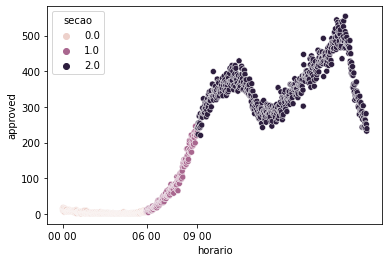

In [102]:
sns.scatterplot(x=df_train.index, y="approved", data=df_train, hue="secao")
plt.xticks(["00 00", "06 00", "09 00"])

In [113]:
from statsmodels.tsa.seasonal import seasonal_decompose

dec = seasonal_decompose(df_train.approved, model="additive", period=15)

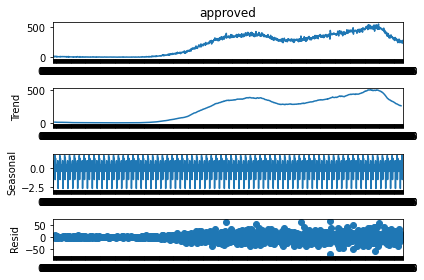

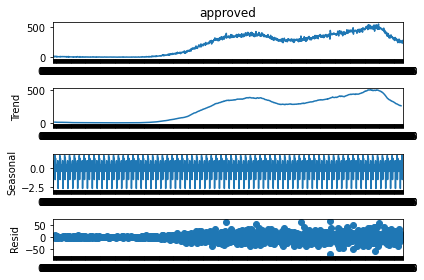

In [114]:
dec.plot()